# t-SNE visualization on Oslo transect dataset

The Oslo transect dataset consists of 360 plant samples collected at 40 sites along a 120 km long transect crossing Oslo, Norway (Templ et al., 2008). At  each site nine different plant materials were sampled and they were terrestrial moss (MOS), fern (FER), European mountain ash leaves (ROG), birch leaves (BIL), bark (BBA) and wood (BWO) and spruce needles (SNE), twigs (TWI) and wood (STW). Geochemical concentrations of 37 elements for the sample materials were reported, of which 13 elements were not considered, either due to the high percentage (more than 50%) of censored values or the quality considerations (Reimann et al., 2007).The remaining 24 elements and the results for loss on ignition (LOI) were all above the detection limits and thus is used here to test the performance of t-SNE on visualizing the geochemical data. This dataset is available in the R package “rrcov” as dataset “OsloTransect” (Todorov and Filzmoser, 2010). 

## Load libraries

In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

In [3]:
# Dimension reduction and clustering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy

In [4]:
# Global plot settings
%matplotlib inline
np.random.seed(10)
plt.style.use('default')

## Load data

In [5]:
# Load data
df = pd.read_csv('OsloTransect.csv', header=0)

# Show the first 5 rows
df.head(5)

,X.ID,X.MAT,XCOO,YCOO,XCOO_km,YCOO_km,X.FOREST,DAY,X.WEATHER,ALT,...,Mn,Mo,Ni,P,Pb,S,Sb,Sr,Ti,Zn
0,101,BIL,578741,6708487,578.741,6708.487,SPRBIR,6,NICE,218,...,657.0,0.04,1.5,1790.0,0.37,1500.0,0.03,41.8,7.0,122.2
1,102,BIL,582865,6706649,582.865,6706.649,SPRBIR,6,NICE,431,...,1669.0,0.04,2.9,2490.0,0.39,1700.0,0.03,30.4,11.0,297.0
2,103,BIL,581155,6720326,581.155,6720.326,SPRBIR,7,RAIN,430,...,2584.0,0.07,2.2,2490.0,0.68,1300.0,0.02,29.5,10.0,192.0
3,104,BIL,580482,6711512,580.482,6711.512,SPRBIR,7,MOIST,475,...,2444.0,0.04,1.7,2670.0,0.43,1300.0,0.02,22.9,11.0,274.3
4,105,BIL,584618,6701621,584.618,6701.621,SPRUCE,8,MOIST,410,...,769.0,0.03,3.7,2040.0,0.38,1800.0,0.03,34.1,9.0,99.4


## Preprocessing

In [6]:
# Step 1 : Feature selection
# df = df.dropna(axis=0, how='any')
pars = ['Ag_ppb', 'As_ash', 'B', 'Ba', 'Ca', 'Cd', 'Co', 'Cr', 'Cu', 'Fe', 'Hg_ppb', 'K', 'La', 'LOI', 'Mg', 'Mn', 'Mo', 'Ni', 'P', 'Pb', 'S', 'Sb', 'Sr', 'Ti', 'Zn']
X_df = df[pars]

# Step 2 : Substitution of censored values
# There is no censored values in this dataset

# Step 3 : Screening the non-measurement values
X_df = X_df.replace(-9999, np.nan)
X_df = X_df.dropna(axis=0, how='any')

# Step 4: Data transformation
X_df = np.log(X_df)

# Step 5 : Standardization 
X = X_df.values
rescaledX = StandardScaler().fit_transform(X)


In [8]:
# Print the remianing number of samples 
n_samples, n_parameters = rescaledX.shape
print('Number of samples:', n_samples, '\nNumber of variables:', n_parameters)

Number of samples: 350 
Number of variables: 25


In [7]:
# Get the true lables for the remianing samples
Y_df = df[['X.ID', 'X.MAT', 'XCOO', 'YCOO', 'Ag_ppb', 'As_ash', 'B', 'Ba', 'Ca', 'Cd', 'Co', 'Cr', 'Cu', 'Fe', 'Hg_ppb', 'K', 'La', 'LOI', 'Mg', 'Mn', 'Mo', 'Ni', 'P', 'Pb', 'S', 'Sb', 'Sr', 'Ti', 'Zn']].dropna(axis=0, how='any')

## Statistical  analysis

### HCA analysis

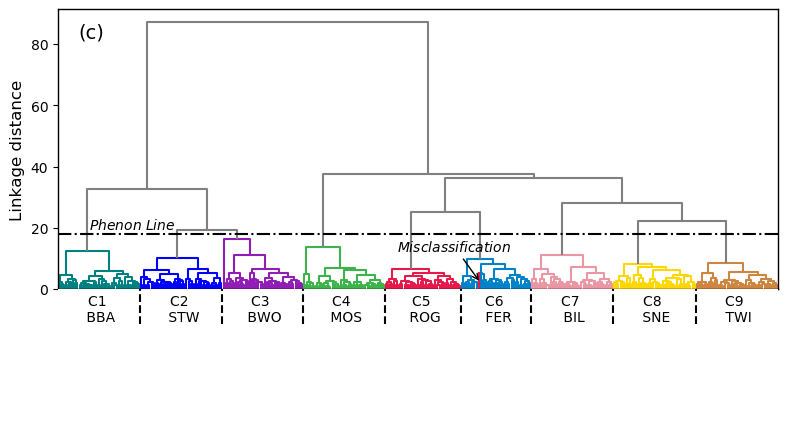

Samples in each cluster: [40, 40, 39, 40, 37, 34, 40, 40, 40]
Number of clusters: 9


In [20]:
Z = hierarchy.linkage(rescaledX, method='ward', metric='euclidean')

# Set the location of phenon line
max_d = 18   

# Figure settings
fig = plt.figure(figsize=(9, 7))

# Axis settings
left, bottom, width, height = 0.1, 0.3, 0.8, 0.4
ax1 = fig.add_axes([left, bottom, width, height])

# Customize the colors for the nine clusters
colors=['#008080', 'blue', '#911eb4', '#3cb44b', '#e6194b', '#0082c8', '#EA96A3', 'gold', 'peru']
# colors=['#EA96A3', '#E19153', '#B89C49', '#60AE47', '#4BABA4', '#4FABBC', '#6DAEE2', '#B6A8EB', '#DF8FE7']
hierarchy.set_link_color_palette(colors)

# Plot the dendrogram
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=0, color_threshold=max_d, above_threshold_color='grey')
hierarchy.set_link_color_palette(None)
ax1.axhline(y=18, linestyle='-.', color='k')
ax1.set_xlabel('sample index')
ax1.set_xticks([])
ax1.set_ylabel('Linkage distance', fontsize=12)

# Calculate number of clusters under the linkage distance of max_d
n_clusters = np.max(np.unique(hierarchy.fcluster(Z, max_d, criterion='distance')))

# Calculate the number of samples for each cluster
cluster_size = [np.sum(hierarchy.fcluster(Z, max_d, criterion='distance')==i + 1) for i in range(n_clusters)]

# Plot the one misclassification
ax1.plot([2045, 2045], [0, 5.12], color='#e6194b')
ax1.annotate('$Misclassification$',
            xy=(2055, 2), xycoords='data',
            xytext=(-60, 23), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
ax1.text(150, 19.5, '$Phenon$' + ' ' + '$Line$')

ax1.text(100, 82, '(c)', fontsize=14)
ax1.spines['top'].set_linewidth(1)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['left'].set_linewidth(1)
ax1.spines['right'].set_linewidth(1)

# The bottom figure
left, bottom, width, height = 0.1, 0.1, 0.8, 0.2
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlim(0, n_samples * 10)
ax2.set_ylim(0, 2)

# Dot line to split each cluster 
cum_cluster_szie = np.cumsum(cluster_size) * 10
for i in range(8):
    ax2.plot([cum_cluster_szie[i], cum_cluster_szie[i]], [1.5, 2], linestyle='--', color='k', lw=1.5)  
    
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.spines['right'].set_color('none')

ax2.set_xticks([])
ax2.set_yticks([])

ax2.text(0                   + (cum_cluster_szie[0] -                   0) / 2, 1.5, 'C1 \n BBA', ha='center', va='bottom')
ax2.text(cum_cluster_szie[0] + (cum_cluster_szie[1] - cum_cluster_szie[0]) / 2, 1.5, 'C2 \n STW', ha='center', va='bottom')
ax2.text(cum_cluster_szie[1] + (cum_cluster_szie[2] - cum_cluster_szie[1]) / 2, 1.5, 'C3 \n BWO', ha='center', va='bottom')
ax2.text(cum_cluster_szie[2] + (cum_cluster_szie[3] - cum_cluster_szie[2]) / 2, 1.5, 'C4 \n MOS', ha='center', va='bottom')
ax2.text(cum_cluster_szie[3] + (cum_cluster_szie[4] - cum_cluster_szie[3]) / 2, 1.5, 'C5 \n ROG', ha='center', va='bottom')
ax2.text(cum_cluster_szie[4] + (cum_cluster_szie[5] - cum_cluster_szie[4]) / 2, 1.5, 'C6 \n FER', ha='center', va='bottom')
ax2.text(cum_cluster_szie[5] + (cum_cluster_szie[6] - cum_cluster_szie[5]) / 2, 1.5, 'C7 \n BIL', ha='center', va='bottom')
ax2.text(cum_cluster_szie[6] + (cum_cluster_szie[7] - cum_cluster_szie[6]) / 2, 1.5, 'C8 \n SNE', ha='center', va='bottom')
ax2.text(cum_cluster_szie[7] + (cum_cluster_szie[8] - cum_cluster_szie[7]) / 2, 1.5, 'C9 \n TWI', ha='center', va='bottom')

plt.show()

# Output the cluster indeices
cluster_ids = hierarchy.fcluster(Z, t=18, criterion='distance')

print('Samples in each cluster:', cluster_size)
print('Number of clusters:', n_clusters)

### PCA analysis

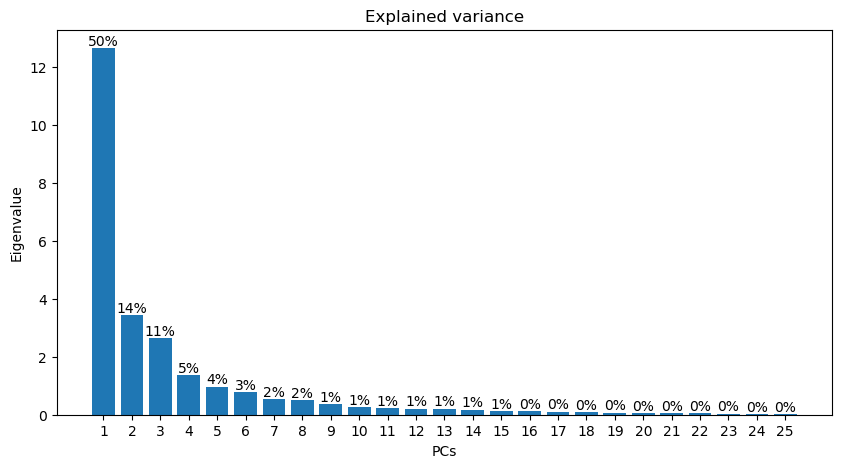

In [9]:
# Perform PCA analysis
pca = PCA(n_components=n_parameters).fit(rescaledX)

# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.bar([str(i) for i in range(1, 26)], pca.explained_variance_)
# plt.axhline(y=1, color='grey', linestyle='-.')
plt.xlabel('PCs')
plt.ylabel('Eigenvalue')
plt.title('Explained variance')


# Attach explained variance ratio above each bar
for i in range(n_parameters):
    height = pca.explained_variance_[i]
    plt.annotate('{:.0f}%'.format(pca.explained_variance_ratio_[i] * 100),
                xy=(i, height),
                xytext=(0, 0),  
                textcoords="offset points",
                ha='center', va='bottom', rotation=00)
    

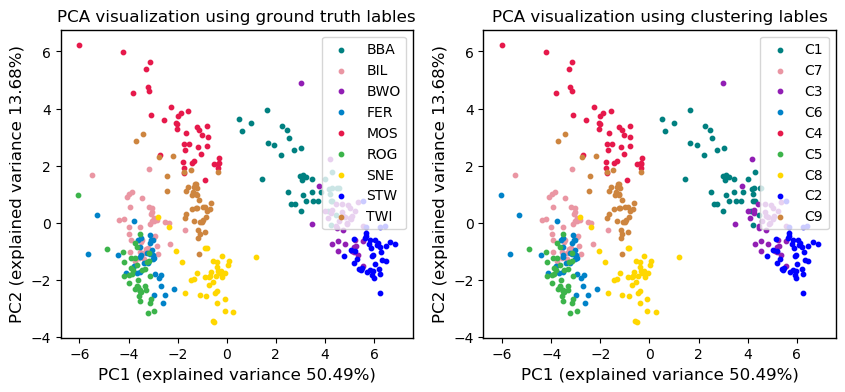

In [27]:
# Plot the PCA plot  
pca = PCA(n_components=2)
X_pca = pca.fit_transform(rescaledX)
 
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(X_pca[Y_df['X.MAT']=='BBA', 0], X_pca[Y_df['X.MAT']=='BBA', 1], color='#008080', label='BBA', s=10)
plt.scatter(X_pca[Y_df['X.MAT']=='BIL', 0], X_pca[Y_df['X.MAT']=='BIL', 1], color='#EA96A3', label='BIL', s=10)
plt.scatter(X_pca[Y_df['X.MAT']=='BWO', 0], X_pca[Y_df['X.MAT']=='BWO', 1], color='#911eb4', label='BWO', s=10)
plt.scatter(X_pca[Y_df['X.MAT']=='FER', 0], X_pca[Y_df['X.MAT']=='FER', 1], color='#0082c8', label='FER', s=10)
plt.scatter(X_pca[Y_df['X.MAT']=='MOS', 0], X_pca[Y_df['X.MAT']=='MOS', 1], color='#e6194b', label='MOS', s=10)
plt.scatter(X_pca[Y_df['X.MAT']=='ROG', 0], X_pca[Y_df['X.MAT']=='ROG', 1], color='#3cb44b', label='ROG', s=10)
plt.scatter(X_pca[Y_df['X.MAT']=='SNE', 0], X_pca[Y_df['X.MAT']=='SNE', 1], color='gold',    label='SNE', s=10)
plt.scatter(X_pca[Y_df['X.MAT']=='STW', 0], X_pca[Y_df['X.MAT']=='STW', 1], color='blue',    label='STW', s=10)
plt.scatter(X_pca[Y_df['X.MAT']=='TWI', 0], X_pca[Y_df['X.MAT']=='TWI', 1], color='peru',    label='TWI', s=10)
plt.xlabel('PC1 (explained variance 50.49%)', fontsize=12)
plt.ylabel('PC2 (explained variance 13.68%)', fontsize=12)
plt.title('PCA visualization using ground truth lables', fontsize=12)
plt.legend(loc='upper right')

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.subplot(122)
plt.scatter(X_pca[cluster_ids[:, ]==1, 0], X_pca[cluster_ids[:, ]==1, 1], color='#008080', label='C1', s=10)
plt.scatter(X_pca[cluster_ids[:, ]==7, 0], X_pca[cluster_ids[:, ]==7, 1], color='#EA96A3', label='C7', s=10)
plt.scatter(X_pca[cluster_ids[:, ]==3, 0], X_pca[cluster_ids[:, ]==3, 1], color='#911eb4', label='C3', s=10)
plt.scatter(X_pca[cluster_ids[:, ]==6, 0], X_pca[cluster_ids[:, ]==6, 1], color='#0082c8', label='C6', s=10)
plt.scatter(X_pca[cluster_ids[:, ]==4, 0], X_pca[cluster_ids[:, ]==4, 1], color='#e6194b', label='C4', s=10)
plt.scatter(X_pca[cluster_ids[:, ]==5, 0], X_pca[cluster_ids[:, ]==5, 1], color='#3cb44b', label='C5', s=10)
plt.scatter(X_pca[cluster_ids[:, ]==8, 0], X_pca[cluster_ids[:, ]==8, 1], color='gold',    label='C8', s=10)
plt.scatter(X_pca[cluster_ids[:, ]==2, 0], X_pca[cluster_ids[:, ]==2, 1], color='blue',    label='C2', s=10)
plt.scatter(X_pca[cluster_ids[:, ]==9, 0], X_pca[cluster_ids[:, ]==9, 1], color='peru',    label='C9', s=10)
plt.xlabel('PC1 (explained variance 50.49%)', fontsize=12)
plt.ylabel('PC2 (explained variance 13.68%)', fontsize=12)
plt.title('PCA visualization using clustering lables', fontsize=12)
plt.legend(loc='upper right')

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.show()

## t-SNE visualization

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 350 samples in 0.002s...
[t-SNE] Computed neighbors for 350 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 350 / 350
[t-SNE] Mean sigma: 1.278605
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.067062
[t-SNE] KL divergence after 2000 iterations: 0.217812


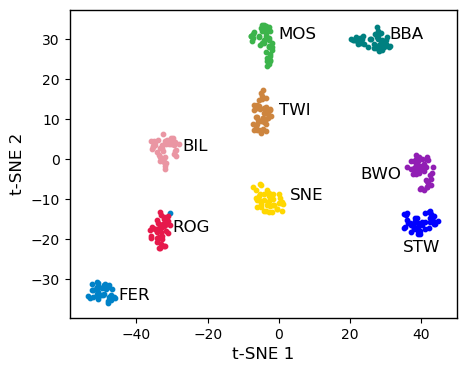

In [29]:
tsne = TSNE(n_components=2,
            init='pca',
            random_state=0, 
            perplexity=20,
            early_exaggeration=12,
            metric='cityblock',
            # method='exact',
            n_iter=2000,
            verbose=1)
X_tsne = tsne.fit_transform(rescaledX)

# Plot the t-SNE plot 
plt.figure(figsize=(5, 4))

plt.scatter(X_tsne[cluster_ids[:, ]==1, 0], X_tsne[cluster_ids[:, ]==1, 1], color='#008080', label='C1', s=10)
plt.scatter(X_tsne[cluster_ids[:, ]==7, 0], X_tsne[cluster_ids[:, ]==7, 1], color='#EA96A3', label='C7', s=10)
plt.scatter(X_tsne[cluster_ids[:, ]==3, 0], X_tsne[cluster_ids[:, ]==3, 1], color='#911eb4', label='C3', s=10)
plt.scatter(X_tsne[cluster_ids[:, ]==6, 0], X_tsne[cluster_ids[:, ]==6, 1], color='#0082c8', label='C6', s=10)
plt.scatter(X_tsne[cluster_ids[:, ]==4, 0], X_tsne[cluster_ids[:, ]==4, 1], color='#3cb44b', label='C4', s=10)
plt.scatter(X_tsne[cluster_ids[:, ]==5, 0], X_tsne[cluster_ids[:, ]==5, 1], color='#e6194b', label='C5', s=10)
plt.scatter(X_tsne[cluster_ids[:, ]==8, 0], X_tsne[cluster_ids[:, ]==8, 1], color='gold',    label='C8', s=10)
plt.scatter(X_tsne[cluster_ids[:, ]==2, 0], X_tsne[cluster_ids[:, ]==2, 1], color='blue',    label='C2', s=10)
plt.scatter(X_tsne[cluster_ids[:, ]==9, 0], X_tsne[cluster_ids[:, ]==9, 1], color='peru',    label='C9', s=10)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)

plt.text(-45, -35, 'FER', fontsize=12)
plt.text(-30, -18, 'ROG', fontsize=12)
plt.text(-27,   2, 'BIL', fontsize=12)
plt.text(3  , -10, 'SNE', fontsize=12)
plt.text(0  ,  11, 'TWI', fontsize=12)
plt.text(0  ,  30, 'MOS', fontsize=12)
plt.text(31 ,  30, 'BBA', fontsize=12)
plt.text(23 ,  -5, 'BWO', fontsize=12)
plt.text(35 , -23, 'STW', fontsize=12)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.show()